# Creation of a De Bruijn Graph from a genome

In [199]:
import networkx as nx
import matplotlib.pyplot as plt

In [200]:
genome = "TACCTTCAGCGCCTTC"
k_mer_size = 7
cyclic = False

In [201]:
from typing import List


def get_kmer_count_from_sequence(sequence, k=3, cyclic=True):
    """
    Returns dictionary with keys representing all possible kmers in a sequence
    and values counting their occurrence in the sequence.
    """
    # dict to store kmers
    kmers = {}

    # count how many times each occurred in this sequence (treated as cyclic)
    for i in range(0, len(sequence)):
        kmer = sequence[i:i + k]

        # for cyclic sequence get kmers that wrap from end to beginning
        length = len(kmer)
        if cyclic:
            if len(kmer) != k:
                kmer += sequence[:(k - length)]

        # if not cyclic then skip kmers at end of sequence
        else:
            if len(kmer) != k:
                continue

        # count occurrence of this kmer in sequence
        if kmer in kmers:
            kmers[kmer] += 1
        else:
            kmers[kmer] = 1

    return kmers

In [202]:
kmers = get_kmer_count_from_sequence(genome, k_mer_size, cyclic)

In [203]:
def get_debruijn_edges_from_kmers(kmers):
    """
    Every possible (k-1)mer (n-1 suffix and prefix of kmers) is assigned
    to a node, and we connect one node to another if the (k-1)mer overlaps
    another. Nodes are (k-1)mers, edges are kmers.
    """
    # store edges as tuples in a set
    edges = []

    # compare each (k-1)mer
    for k1 in kmers:
        for k2 in kmers:
            if k1 != k2:
                # if they overlap then add to edges
                if k1[1:] == k2[:-1]:
                    edges.append((k1[:-1], k2[:-1]))

    return edges

In [204]:
edges = get_debruijn_edges_from_kmers(kmers)

DiGraph with 10 nodes and 9 edges


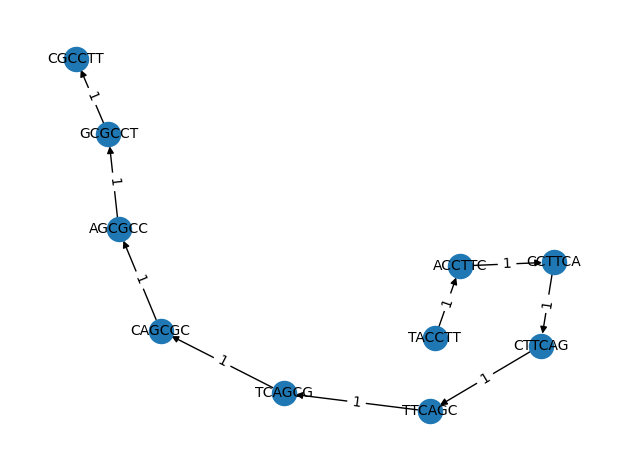

In [205]:
from collections import Counter
graph = nx.DiGraph()
counted_edges = Counter(edges)
for (i, j) in counted_edges:
    graph.add_edge(i, j, count=counted_edges[(i, j)])
print(graph)

pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_edges(graph, pos, edgelist=edges, width=1)
nx.draw_networkx_labels(graph, pos, font_size=10, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(graph, "count")
nx.draw_networkx_edge_labels(graph, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()